# Zarr direct access example

Author: Nick Forbes-Smith

Using [NOAA CRW degree heating weeks](https://www.coris.noaa.gov/search/catalog/search/resource/details.page?uuid=%7BF77EF0B8-C12F-463F-B66A-CC922E50A39D%7D) data as an example - this notebook demonstrates direct access to zarr

- Inspect metadata
- Fetch single time slice and plot
- Fetch time series for single point and plot

## Inspect metadata

In [1]:
import xarray as xr
import s3fs

zarr_path = "s3://rimrep-data-public/016-023-noaa-crw/v1.zarr"

s3 = s3fs.S3FileSystem(anon=True)
data = xr.open_dataset(s3fs.S3Map(zarr_path, s3=s3), engine="zarr")

data

<xarray.Dataset>
Dimensions:              (time: 13846, lat: 360, lon: 720)
Coordinates:
  * lat                  (lat) float32 -8.025 -8.075 -8.125 ... -25.92 -25.98
  * lon                  (lon) float32 133.0 133.1 133.1 ... 168.9 168.9 169.0
  * time                 (time) datetime64[ns] 1985-03-25T12:00:00 ... 2023-0...
Data variables:
    crs                  int16 ...
    degree_heating_week  (time, lat, lon) float32 ...
    mask                 (time, lat, lon) float32 ...
Attributes: (12/62)
    Conventions:                CF-1.6, ACDD-1.3
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This is a product of the NOAA Coral Reef Watc...
    contributor_name:           NOAA Coral Reef Watch Program
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          19850326T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19850325T000000Z
    title:                      NOAA Coral Reef Watch Daily Global 5km Satell...
    uuid:                       24c7f597-298c-4be6-a0c2-ad97b993f60f

## Fetch the first time slice and plot

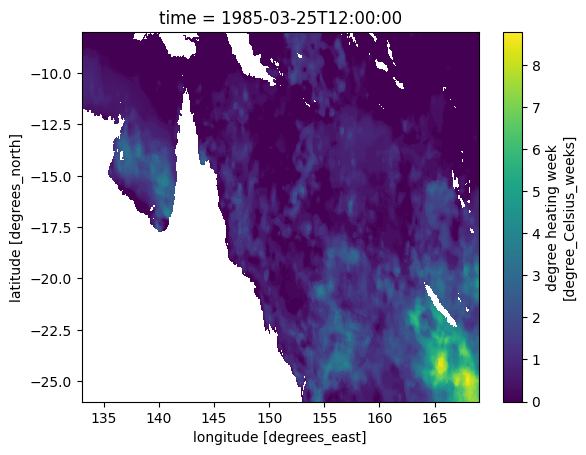

In [2]:
data.isel(time=0).degree_heating_week.plot()

## Fetch time series for single point and plot

From `2020-01-01` to `2023-01-01` for the point nearest to `(-20, 155)`

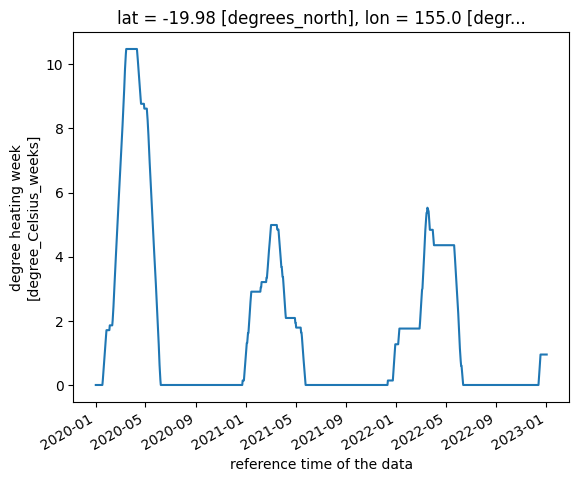

In [3]:
data.sel(lat=-20, lon=155, method="nearest").sel(time=slice("2020-01-01", "2023-01-01")).degree_heating_week.plot()